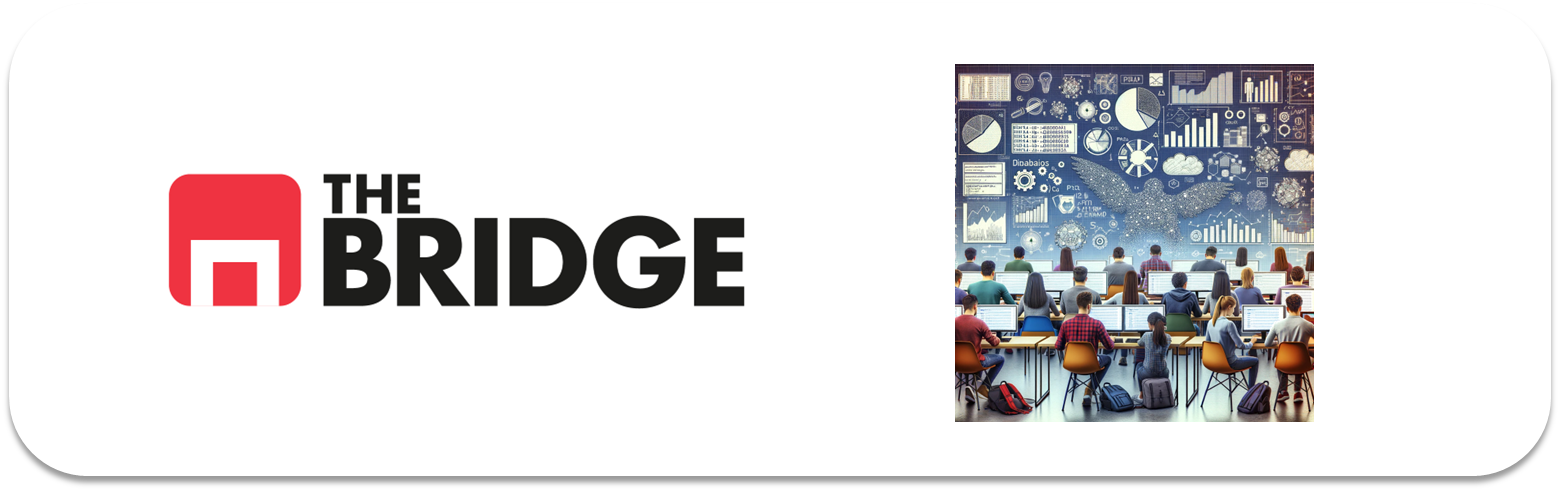

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [75]:
import os
os.listdir("./data/hard_to_find")

['obligatoria_hard.csv']

In [76]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv")

In [77]:
df.head()

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...


In [78]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")

In [79]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

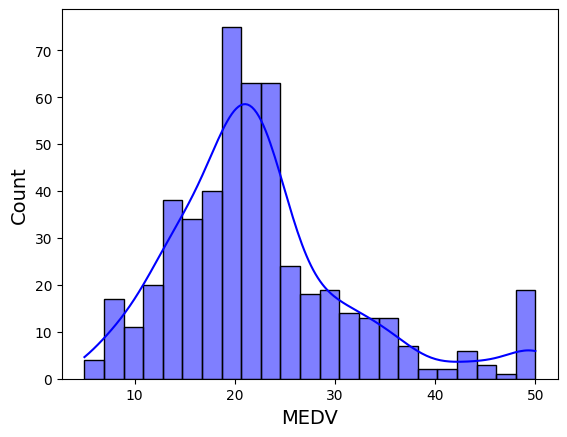

In [81]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

In [82]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [83]:
len(train_set)

404

In [84]:
len(test_set)

102

4. Construye las parejas X,y de train y test

In [85]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [86]:
# Feautures
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']]

# Target
y = df['MEDV']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

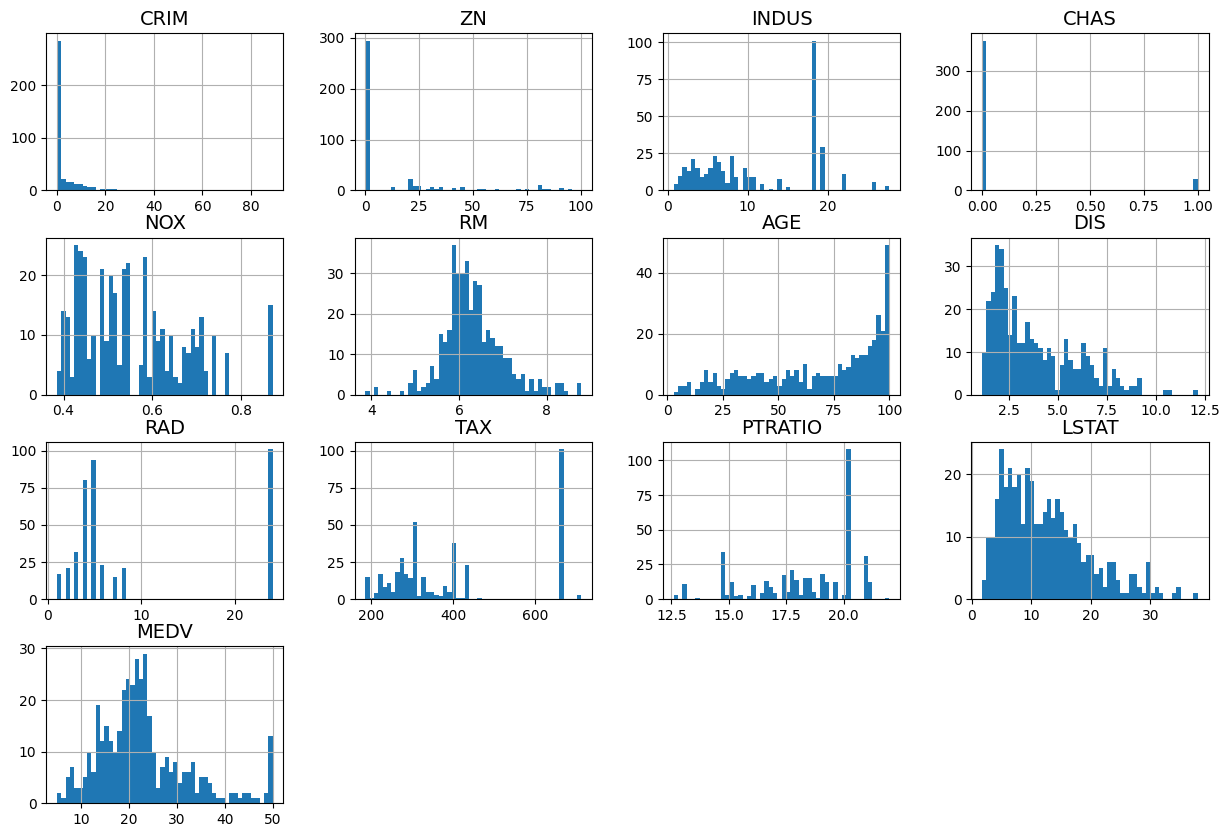

In [88]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
train_set.hist(bins=50, figsize=(15, 10)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset 
                                          # primero ancho luego largo
plt.show()

In [89]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression
#SelectKBest con f_regression el modelo elije las variables más predictivas según su relación estadística con MEDV.
#Esto da un ranking por poder predictivo, más allá de la simple correlación

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)

scores = selector.scores_
features = X_train.columns
ranking = sorted(zip(features, scores), key=lambda x: x[1], reverse=True)
ranking

[('LSTAT', np.float64(476.339249828044)),
 ('RM', np.float64(410.2292390655724)),
 ('PTRATIO', np.float64(127.84477945275673)),
 ('INDUS', np.float64(114.32053564505807)),
 ('TAX', np.float64(107.77140851919823)),
 ('NOX', np.float64(84.01381136872561)),
 ('RAD', np.float64(71.01384959917787)),
 ('CRIM', np.float64(67.88373340971266)),
 ('AGE', np.float64(52.62108097290034)),
 ('ZN', np.float64(42.58820519772762)),
 ('DIS', np.float64(23.522254153595483)),
 ('CHAS', np.float64(15.161467594886293))]

- LSTAT y RM: son las variables con mayor poder predictivo según SelectKBest y mayor correlación absoluta con MEDV.
- PTRATIO, INDUS, TAX, NOX: tienen correlaciones moderadas y scores altos en SelectKBest, por lo que aportan información relevante al modelo.
- CRIM, RAD, AGE: aunque algo menos fuertes, siguen teniendo relación clara con MEDV y scores razonables, por lo que se incluyen en el modelo base.
- ZN, DIS, CHAS: se descartan por su menor score y menor correlación con MEDV.

#### Lista de features: 'CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX','PTRATIO', 'LSTAT'.


6. Trata las variables para que funcionen lo mejor posible en el modelo.

Min-Max Scaling

También se le conoce como normaización es el algoritmo más sencillo y lo que hace es transformar los rangos de las variables numéricas para que estos esten entre 0 y 1 (aunque el método que vamos a usar permite cambiar el rango, por ejemplo entre -1 y 1):

$$ \hat x_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}$$

In [91]:
from sklearn.preprocessing import MinMaxScaler

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set[features]), columns= features)
resultado_min_max

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.662474,-1.0,0.285926,-1.0,-0.057613,-0.413870,0.944387,-0.823387,1.000000,0.828244,0.617021,0.279249
1,-0.986100,-1.0,-0.451852,-1.0,-0.370370,-0.198292,0.104016,-0.387282,-0.739130,-0.541985,0.787234,-0.628035
2,-0.999425,-0.3,-0.605926,-1.0,-0.782305,-0.118161,-0.579815,0.002301,-1.000000,-0.553435,-0.085106,-0.663355
3,-0.841709,-1.0,0.285926,-1.0,-0.057613,-0.088875,0.693100,-0.837736,1.000000,0.828244,0.617021,0.189845
4,-0.983888,-1.0,-0.451852,-1.0,-0.370370,-0.241814,0.371782,-0.514972,-0.739130,-0.541985,0.787234,-0.472958
...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.996355,-1.0,-0.420741,-1.0,-0.444444,-0.197478,0.833162,-0.803326,-0.652174,-0.248092,0.765957,-0.065673
400,-0.993478,-0.6,-0.539259,-1.0,-0.674897,-0.189343,-0.192585,-0.399940,-0.826087,-0.862595,0.276596,-0.378035
401,-0.999866,0.6,-0.905926,-1.0,-0.794239,0.127517,-0.447992,0.312079,-0.739130,-0.645038,-0.063830,-0.764901
402,-0.749316,-1.0,0.285926,-1.0,0.460905,0.125076,0.888774,-0.819022,1.000000,0.828244,0.617021,0.188742


In [92]:
resultado_min_max.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.919070,-0.768614,-0.241107,-0.856436,-0.294304,-0.002281,0.352347,-0.512845,-0.273353,-0.171633,0.216663,-0.407983
std,0.199513,0.463050,0.510712,0.516894,0.484381,0.288571,0.576620,0.387605,0.746932,0.634247,0.474192,0.392405
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.998373,-1.000000,-0.674815,-1.000000,-0.724280,-0.175310,-0.121524,-0.825719,-0.739130,-0.648855,-0.106383,-0.721716
50%,-0.994328,-1.000000,-0.420741,-1.000000,-0.370370,-0.045353,0.540680,-0.627868,-0.652174,-0.454198,0.297872,-0.492550
75%,-0.928200,-0.600000,0.285926,-1.000000,0.012346,0.128229,0.869207,-0.223199,-0.043478,0.828244,0.617021,-0.191915
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Standardization

Hace la siguiente transformación para cada valor de una variable numérica X:

$$x_i = \dfrac{x - \bar x}{s_x}\ \text{,donde } s_x \text{ es la desviación estándar de la variable numérica}$$

In [93]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[features]),columns = features)
resultado_standardization.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,-0.165787


In [94]:
resultado_standardization.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.638154e-17,0.000000,-4.177077e-17,1.319077e-17,-5.111423e-16,-2.616169e-16,-4.858600e-16,5.248827e-17,-9.453384e-17,-1.516938e-16,8.519038e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-0.500320,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-1.510559e+00
25%,-3.979761e-01,-0.500320,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,-8.005057e-01
50%,-3.776748e-01,-0.500320,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,-2.157763e-01
75%,-4.582119e-02,0.364589,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,5.513070e-01
max,9.630689e+00,3.824227,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,3.592534e+00


Trasformado de distribuciones

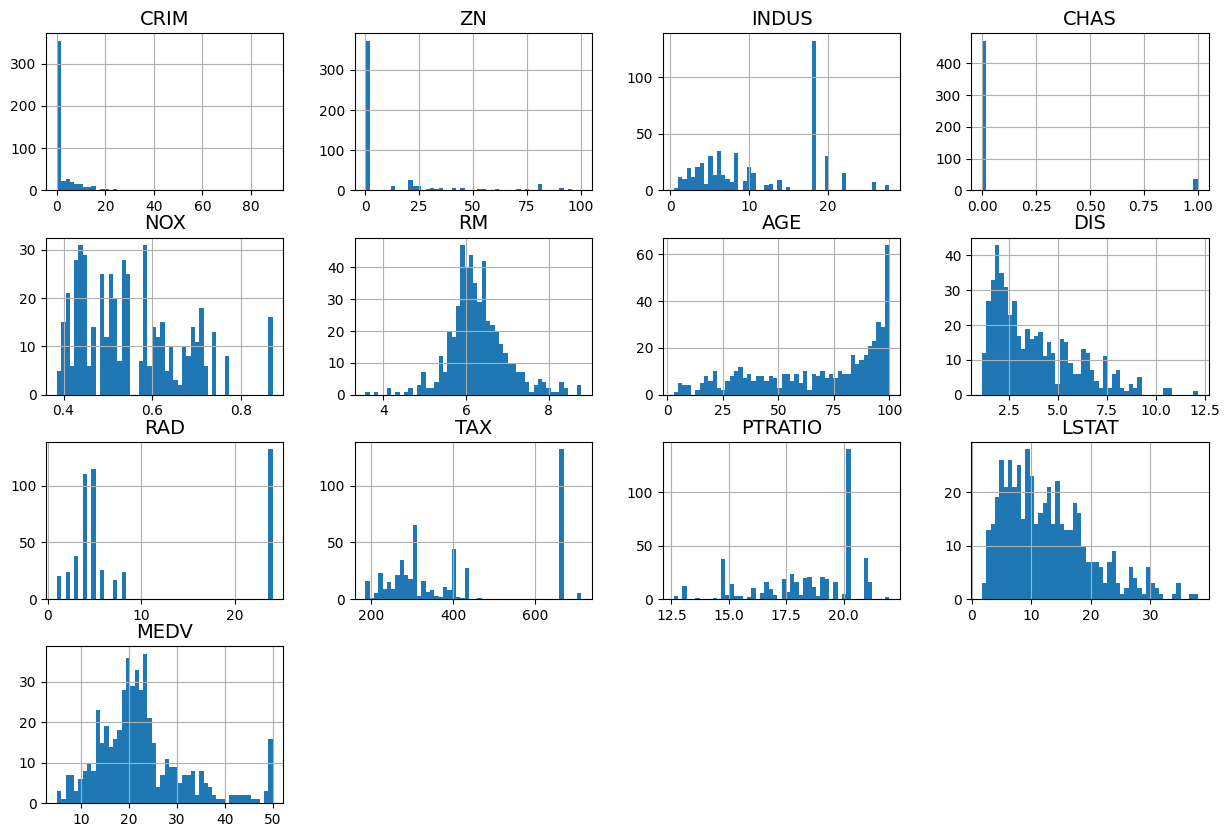

In [95]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.hist(bins=50, figsize=(15, 10)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset 
                                          # primero ancho luego largo
plt.show()

- CRIM: tiene una cola larguísima. Log reduce el impacto de los valores extremos.
- DIS: muy sesgada, y la transformación puede hacerla más simétrica.
- TAX: también muestra acumulación en valores bajos y dispersión en los altos.
- AGE: si bien no es tan extrema, tiene una forma que podría mejorar con log.
- RAD: no conviene transformar porque es discreta (valores enteros repetidos).

In [96]:
features_log = ['CRIM', 'DIS', 'TAX', 'AGE']
X_train_log = X_train.copy()

for col in features_log:
    X_train_log[col] = np.log1p(X_train[col])

array([[<Axes: title={'center': 'CRIM'}>,
        <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'TAX'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

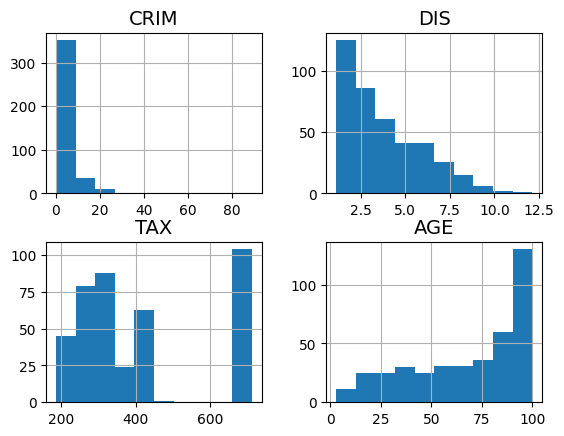

In [97]:
f_num = ['CRIM', 'DIS', 'TAX', 'AGE']
train_set[f_num].hist()

7. Construye un modelo de regresión lineal.

In [101]:
from sklearn.linear_model import LinearRegression

# Creamos un objeto
lm = LinearRegression()

In [102]:
# Entrenamos con los datos de train
lm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


8. Analiza si lo crees conveniente los pesos y la importancia de las features.

In [103]:
coef_df = pd.DataFrame(lm.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.112351
INDUS,0.135591
NOX,-8.915978
RM,4.642770
AGE,0.031643
RAD,0.261757
TAX,-0.012627
PTRATIO,-0.988247
LSTAT,-0.571266


- Un incremento de 1 unidad en CRIM equivale a una reducción de 112.35 dólares en el valor medio de la vivienda.
- Un incremento de 1 unidad en INDUS equivale a un aumento de 135.59 dólares en el valor medio de la vivienda.
- Un incremento de 1 unidad en NOX equivale a una reducción de 8,915.98 dólares.
- Un incremento de 1 unidad en RM equivale a un aumento de 4,642.77 dólares.
- Un incremento de 1 unidad en AGE equivale a un aumento de 31.64 dólares.
- Un incremento de 1 unidad en RAD equivale a un aumento de 261.76 dólares.
- Un incremento de 1 unidad en TAX equivale a una reducción de 12.63 dólares.
- Un incremento de 1 unidad en PTRATIO equivale a una reducción de 988.25 dólares.
- Un incremento de 1 unidad en LSTAT equivale a una reducción de 571.27 dólares.


9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [104]:
from sklearn import metrics

Train Error

In [105]:
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 3.6047164399256406
MSE train 25.604222461627188
RMSE train 5.060061507692094
R2 train 0.7052697220099761


Test Error

In [106]:
predictions = lm.predict(X_test)
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 3.2092030291756517
MSE test 25.585194544683905
RMSE test 5.058180952149093
R2 test 0.6511131235552197


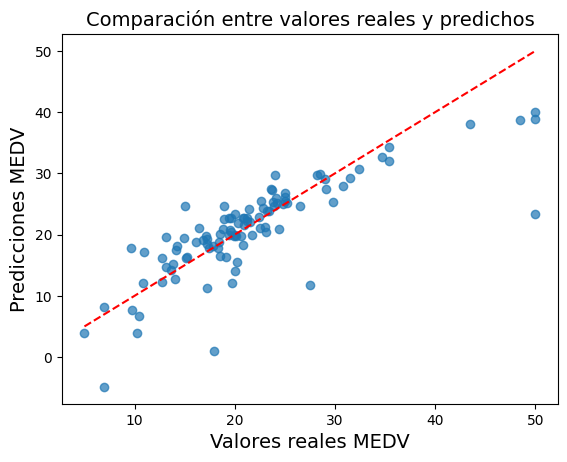

In [107]:
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel("Valores reales MEDV")
plt.ylabel("Predicciones MEDV")
plt.title("Comparación entre valores reales y predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

In [109]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))


Train MSE sin regularización: 25.6
Test MSE sin regularización: 25.59
Train MSE: 25.86
Test MSE: 25.76


In [111]:
ridgeR = Ridge(alpha = 0.02) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 25.6
Test MSE sin regularización: 25.59
Train MSE: 25.6
Test MSE: 25.59


In [142]:
ridgeR = Ridge(alpha = 0.05) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 25.6
Test MSE sin regularización: 25.59
Train MSE: 25.6
Test MSE: 25.6


- No hay overfitting evidente.
- Las features que seleccione son relevantes y estables.

11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

Me quedaría con el modelo de Regresión Lineal sin regularización porque ofrece el mejor equilibrio entre error en train y test, no muestra señales de overfitting, así que la regularización no aporta mejoras significativas. Además Ridge no reduce el error de manera relevante en algunos casos lo empeoran.
